# Sommaire :

- 1) <a href="#C1">Importation du jeu de données</a>  
  
- 2) <a href="#C2">Essais des différentes approches de modélisation</a>
    - <a href="#C3">K-means
    - <a href="#C4">DBSCAN
    - <a href="#C5">Clustering hiérarchique
    
- 3) <a href="#C6">Simulation : Analyse de la stabilité temporelle de la segmentation retenue

In [7]:
%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a name="C1">Importation du jeu de données

In [9]:
df_final = pd.read_csv("df_final.csv", sep=",")

In [10]:
df_final

Unnamed: 0                customer_unique_id  \
0               0  0000366f3b9a7992bf8c76cfdf3221e2   
1               1  0000b849f77a49e4a4ce2b2a4ca5be3f   
2               2  0000f46a3911fa3c0805444483337064   
3               3  0000f6ccb0745a6a4b88665a16c9f078   
4               4  0004aac84e0df4da2b147fca70cf8255   
...           ...                               ...   
95372       95372  fffcf5a5ff07b0908bd4e2dbc735a684   
95373       95373  fffea47cd6d3cc0a88bd621562a9d061   
95374       95374  ffff371b4d645b6ecea244b27531430a   
95375       95375  ffff5962728ec6157033ef9805bacc48   
95376       95376  ffffd2657e2aad2907e67c3e9daecbeb   

       mean_payment_installments  number_of_orders  \
0                            8.0                 1   
1                            1.0                 1   
2                            8.0                 1   
3                            4.0                 1   
4                            6.0                 1   
...                          ...               ...   
95372                       10.0                 1   
95373                        1.0                 1   
95374                        1.0                 1   
95375                        5.0                 1   
95376                        4.0                 1   

       last_order_purchase_recency_in_months  mean_ratio_voucher  \
0                                   5.265767                 0.0   
1                                   5.363990                 0.0   
2                                  19.248062                 0.0   
3                                  12.152214                 0.0   
4                                  11.069007                 0.0   
...                                      ...                 ...   
95372                              16.291224                 0.0   
95373                              10.214272                 0.0   
95374                              20.273769                 0.0   
95375                               5.522646                 0.0   
95376                              17.507810                 0.0   

       mean_review_score  mean_order_value  
0                    5.0            141.90  
1                    4.0             27.19  
2                    3.0             86.22  
3                    4.0             43.62  
4                    5.0            196.89  
...                  ...               ...  
95372                5.0           2067.42  
95373                4.0             84.58  
95374                5.0            112.46  
95375                5.0            133.69  
95376                5.0             71.56  

[95377 rows x 8 columns]

In [11]:
df_final = df_final.drop("Unnamed: 0", axis=1)

In [12]:
df_final

customer_unique_id  mean_payment_installments  \
0      0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
2      0000f46a3911fa3c0805444483337064                        8.0   
3      0000f6ccb0745a6a4b88665a16c9f078                        4.0   
4      0004aac84e0df4da2b147fca70cf8255                        6.0   
...                                 ...                        ...   
95372  fffcf5a5ff07b0908bd4e2dbc735a684                       10.0   
95373  fffea47cd6d3cc0a88bd621562a9d061                        1.0   
95374  ffff371b4d645b6ecea244b27531430a                        1.0   
95375  ffff5962728ec6157033ef9805bacc48                        5.0   
95376  ffffd2657e2aad2907e67c3e9daecbeb                        4.0   

       number_of_orders  last_order_purchase_recency_in_months  \
0                     1                               5.265767   
1                     1                               5.363990   
2                     1                              19.248062   
3                     1                              12.152214   
4                     1                              11.069007   
...                 ...                                    ...   
95372                 1                              16.291224   
95373                 1                              10.214272   
95374                 1                              20.273769   
95375                 1                               5.522646   
95376                 1                              17.507810   

       mean_ratio_voucher  mean_review_score  mean_order_value  
0                     0.0                5.0            141.90  
1                     0.0                4.0             27.19  
2                     0.0                3.0             86.22  
3                     0.0                4.0             43.62  
4                     0.0                5.0            196.89  
...                   ...                ...               ...  
95372                 0.0                5.0           2067.42  
95373                 0.0                4.0             84.58  
95374                 0.0                5.0            112.46  
95375                 0.0                5.0            133.69  
95376                 0.0                5.0             71.56  

[95377 rows x 7 columns]

# <a name="C2">Essais des différentes approches de modélisation

## <a name="C3">K-means

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
# Il n'y a que des variables numériques. On utilise un StandardScaler pour les normaliser.

X = df_final.drop(["customer_unique_id"], axis=1)
X_norm = StandardScaler().fit_transform(X)

In [15]:
# On test le K-Means sur différentes valeurs de K pour voir l'impact sur le coefficient de silhouette et l'inertie.

silhouettes = []
inertia = []

for num_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_norm)
    silh = silhouette_score(X_norm, kmeans.labels_)
    silhouettes.append(silh)
    inertia.append(kmeans.score(X_norm))

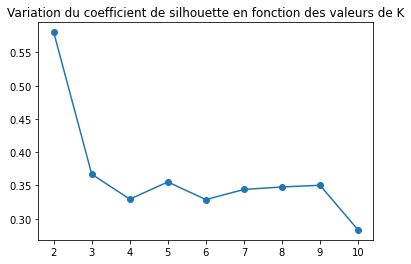

In [16]:
# On affiche les résultats sur un graphique pour le coefficient de silhouette.

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title('Variation du coefficient de silhouette en fonction des valeurs de K')
plt.show()

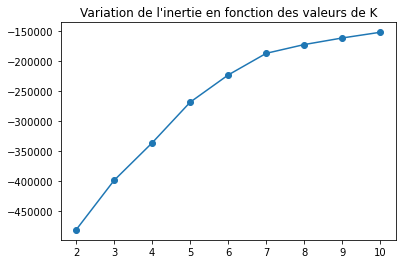

In [17]:
# On affiche les résultats sur un graphique pour l'inertie également.

plt.plot(range(2, 11), inertia, marker="o")
plt.title("Variation de l'inertie en fonction des valeurs de K")
plt.show()

--> On remarque qu'il y un 'coude' sur l'inertie qui se forme pour k=7 et que le coefficient de silhouette pour k=7 est proche des plus grandes valeurs, sauf pour k=2 mais on peut considérer que seulement 2 groupes de clients ne serait pas intéressant d'un point de vue métier.

In [18]:
# Analysons donc maintenant le profil des groupes pour k=7.

kmeans = KMeans(n_clusters=7)
kmeans.fit(X_norm)

KMeans(n_clusters=7)

In [19]:
silhouette_score(X_norm, kmeans.labels_)

0.34402909360436096

In [20]:
kmeans.score(X_norm)

-186750.35583909604

In [21]:
df_final["kmeans_labels"] = kmeans.labels_

In [22]:
df_final["kmeans_labels"].value_counts()

1    35733
6    25709
2    14384
0    12149
5     2962
3     2930
4     1510
Name: kmeans_labels, dtype: int64

In [23]:
df_final.drop("customer_unique_id", axis=1).groupby("kmeans_labels").mean()

mean_payment_installments  number_of_orders  \
kmeans_labels                                                
0                               8.284386          1.000082   
1                               1.860297          1.000000   
2                               2.444869          1.000000   
3                               1.146075          1.020819   
4                               6.449669          1.007285   
5                               3.340810          2.272789   
6                               2.052939          1.000000   

               last_order_purchase_recency_in_months  mean_ratio_voucher  \
kmeans_labels                                                              
0                                           9.751611            0.002687   
1                                           5.619686            0.001383   
2                                           9.558620            0.001763   
3                                           9.998658            0.895242   
4                                           9.514848            0.006131   
5                                           8.874368            0.031066   
6                                          14.620809            0.001769   

               mean_review_score  mean_order_value  
kmeans_labels                                       
0                       4.292370        258.503092  
1                       4.662357        118.528441  
2                       1.535943        142.637125  
3                       4.035836        114.706766  
4                       3.832119       1413.842394  
5                       4.116405        143.060039  
6                       4.627796        118.507713

In [24]:
df_final.drop("customer_unique_id", axis=1).groupby("kmeans_labels").median()

mean_payment_installments  number_of_orders  \
kmeans_labels                                                
0                                    8.0               1.0   
1                                    1.0               1.0   
2                                    2.0               1.0   
3                                    1.0               1.0   
4                                    8.0               1.0   
5                                    2.5               2.0   
6                                    1.0               1.0   

               last_order_purchase_recency_in_months  mean_ratio_voucher  \
kmeans_labels                                                              
0                                           9.427284            0.000000   
1                                           5.545084            0.000000   
2                                           8.915130            0.000000   
3                                           9.469135            0.994871   
4                                           8.837547            0.000000   
5                                           8.196792            0.000000   
6                                          14.286180            0.000000   

               mean_review_score  mean_order_value  
kmeans_labels                                       
0                            5.0           198.700  
1                            5.0            92.830  
2                            1.0           106.780  
3                            5.0            82.725  
4                            5.0          1221.835  
5                            4.5           109.105  
6                            5.0            88.180

In [25]:
# On crée un pivot table pour résumer les valeurs moyennes des variables pour chaque groupe.

df_labels = pd.pivot_table(
    df_final.drop("customer_unique_id", axis=1),
    index=["kmeans_labels"],
    values=[
        "mean_payment_installments",
        "last_order_purchase_recency_in_months",
        "mean_ratio_voucher",
        "mean_review_score",
        "mean_order_value",
        "number_of_orders",
    ],
    aggfunc={
        "mean_payment_installments": [len, np.mean],
        "last_order_purchase_recency_in_months": np.mean,
        "mean_ratio_voucher": np.mean,
        "mean_review_score": np.mean,
        "mean_order_value": np.mean,
        "number_of_orders": np.mean,
    },
)

In [26]:
df_labels

last_order_purchase_recency_in_months mean_order_value  \
                                               mean             mean   
kmeans_labels                                                          
0                                          9.751611       258.503092   
1                                          5.619686       118.528441   
2                                          9.558620       142.637125   
3                                          9.998658       114.706766   
4                                          9.514848      1413.842394   
5                                          8.874368       143.060039   
6                                         14.620809       118.507713   

              mean_payment_installments           mean_ratio_voucher  \
                                    len      mean               mean   
kmeans_labels                                                          
0                                 12149  8.284386           0.002687   
1                                 35733  1.860297           0.001383   
2                                 14384  2.444869           0.001763   
3                                  2930  1.146075           0.895242   
4                                  1510  6.449669           0.006131   
5                                  2962  3.340810           0.031066   
6                                 25709  2.052939           0.001769   

              mean_review_score number_of_orders  
                           mean             mean  
kmeans_labels                                     
0                      4.292370         1.000082  
1                      4.662357         1.000000  
2                      1.535943         1.000000  
3                      4.035836         1.020819  
4                      3.832119         1.007285  
5                      4.116405         2.272789  
6                      4.627796         1.000000

In [27]:
df_labels.columns = [
    "mean_last_order_purchase_recency_in_months",
    "mean_order_value",
    "count",
    "mean_payment_installments",
    "mean_ratio_voucher",
    "mean_review_score",
    "mean_number_of_orders",
]

In [28]:
df_labels = df_labels[
    [
        "count",
        "mean_last_order_purchase_recency_in_months",
        "mean_review_score",
        "mean_ratio_voucher",
        "mean_payment_installments",
        "mean_order_value",
        "mean_number_of_orders",
    ]
]

In [29]:
df_labels

count  mean_last_order_purchase_recency_in_months  \
kmeans_labels                                                      
0              12149                                    9.751611   
1              35733                                    5.619686   
2              14384                                    9.558620   
3               2930                                    9.998658   
4               1510                                    9.514848   
5               2962                                    8.874368   
6              25709                                   14.620809   

               mean_review_score  mean_ratio_voucher  \
kmeans_labels                                          
0                       4.292370            0.002687   
1                       4.662357            0.001383   
2                       1.535943            0.001763   
3                       4.035836            0.895242   
4                       3.832119            0.006131   
5                       4.116405            0.031066   
6                       4.627796            0.001769   

               mean_payment_installments  mean_order_value  \
kmeans_labels                                                
0                               8.284386        258.503092   
1                               1.860297        118.528441   
2                               2.444869        142.637125   
3                               1.146075        114.706766   
4                               6.449669       1413.842394   
5                               3.340810        143.060039   
6                               2.052939        118.507713   

               mean_number_of_orders  
kmeans_labels                         
0                           1.000082  
1                           1.000000  
2                           1.000000  
3                           1.020819  
4                           1.007285  
5                           2.272789  
6                           1.000000

In [30]:
# Proportion de clients par cluster :

(df_labels["count"] / df_labels["count"].sum()).sort_values(ascending=False)

kmeans_labels
1    0.374650
6    0.269551
2    0.150812
0    0.127379
5    0.031056
3    0.030720
4    0.015832
Name: count, dtype: float64

--> On pourrait donc définir les clusters comme ci-dessous :  
0 --> clients d'un niveau économique plus faible car ils paient en 8 fois des montants beaucoup plus faibles que par exemple le groupe 4 dont les clients paient en 6 fois.  
1 --> clients qui ont passé leur dernière commande récemment et qui sont très satisfaits.  
2 --> clients mécontents.  
3 --> clients qui utilisent quasiment à 100% des vouchers pour payer.  
4 --> clients qui ont passé une commande d'un montant élevé et qui sont assez satisfaits.     
5 --> clients qui ont passé plusieurs commandes.  
6 --> clients qui ont passé leur dernière commande il y a longtemps et qui sont très satisfaits.  

In [31]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go

In [32]:
# On crée une fonction qui permet d'afficher les groupes sur un radar plot à l'aide de la librairie plotly.

def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(
        scaler.fit_transform(data), index=data.index, columns=data.columns
    ).reset_index()

    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(
            go.Scatterpolar(
                r=data[data[group] == k].iloc[:, 1:].values.reshape(-1),
                theta=data.columns[1:],
                fill="toself",
                name="Cluster " + str(k),
            )
        )

    fig.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
        showlegend=True,
        title={
            "text": "Comparaison des clusters",
            "y": 0.95,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
        },
        title_font_color="blue",
        title_font_size=18,
    )

    fig.show()

In [33]:
# On affiche les groupes sur un radar plot.

plot_radars(data=df_labels.drop(["count"], axis=1), group="kmeans_labels")

In [34]:
from sklearn.metrics import adjusted_rand_score

In [35]:
from sklearn.metrics.cluster import pair_confusion_matrix

In [36]:
# On crée une fonction pour calculer le ARI car en utilisant le adjusted_rand_score pour des listes trop grandes
# on obtient le warning suivant : RuntimeWarning: overflow encountered in longlong_scalars
# avec une valeur ARI supérieur à 1.


def ari(labels_true, labels_pred):
    """safer implementation of ari score calculation"""
    (tn, fp), (fn, tp) = pair_confusion_matrix(labels_true, labels_pred)
    tn = int(tn)
    tp = int(tp)
    fp = int(fp)
    fn = int(fn)

    # Special cases: empty data or full agreement
    if fn == 0 and fp == 0:
        return 1.0

    return 2.0 * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))

In [37]:
# Nous allons donc maintenant analyser la stabilité à l'initialisation du k-means en gardant les labels obtenus précédemment
# puis en les comparant grâce à l'indice de Rand ajusté (ARI) aux nouveaux labels obtenus à chaque nouvelle itération.
# Nous allons réaliser 10 nouvelles itérations du k-means.


for i in range(1, 11):
    kmeans_iter = KMeans(n_clusters=7, n_init=1)
    kmeans_iter.fit(X_norm)
    print(
        "Itération "
        + str(i)
        + " : ARI = "
        + str(np.round(ari(kmeans.labels_, kmeans_iter.labels_), decimals=3))
    )

Itération 1 : ARI = 0.995
Itération 2 : ARI = 0.716
Itération 3 : ARI = 0.999
Itération 4 : ARI = 0.999
Itération 5 : ARI = 0.997
Itération 6 : ARI = 0.998
Itération 7 : ARI = 0.998
Itération 8 : ARI = 0.956
Itération 9 : ARI = 0.958
Itération 10 : ARI = 0.999


--> Les itérations sont quasiment toutes proches de 1 donc on peut en conclure que la stabilité à l'initialisation du k-means est bonne.

In [38]:
from sklearn.manifold import TSNE

In [39]:
# Utilisons maintenant le t-SNE pour visualiser les clusters en 2 dimensions.

df_tsne = pd.DataFrame(
    TSNE(n_components=2).fit_transform(X_norm),
    columns=["dimension_1", "dimension_2"],
    index=df_final.index,
)

In [40]:
df_tsne

dimension_1  dimension_2
0        20.898008    26.592745
1       -51.400436    25.201532
2         1.742347    32.433243
3       -39.289021   -19.960882
4       -18.006895    37.881878
...            ...          ...
95372    -0.231157     7.868247
95373   -44.906528    -3.019923
95374     7.257974   -26.290625
95375   -26.474392    -9.086681
95376    37.508366   -27.641033

[95377 rows x 2 columns]

In [41]:
df_tsne["kmeans_labels"] = df_final["kmeans_labels"]

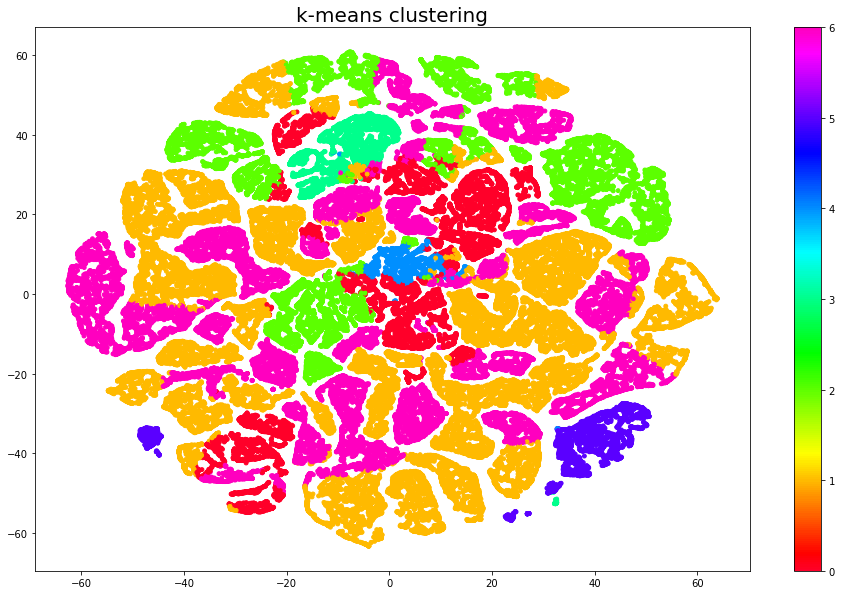

In [42]:
plt.figure(figsize=(16, 10))
plt.scatter(
    df_tsne["dimension_1"],
    df_tsne["dimension_2"],
    c=df_tsne["kmeans_labels"],
    s=15,
    cmap="gist_rainbow",
)
plt.title("k-means clustering", fontdict={"fontsize": 20})
plt.colorbar()
plt.show()

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Utilisons à présent une PCA pour visualiser les clusters en 2 dimensions.

pca = PCA()

In [45]:
pca.fit(X_norm)

PCA()

In [46]:
pca.explained_variance_ratio_

array([0.22740422, 0.17279968, 0.16835567, 0.16284213, 0.15855766,
       0.11004065])

In [47]:
df_pca = pd.DataFrame(
    PCA(n_components=2).fit_transform(X_norm),
    columns=["pc_1", "pc_2"],
    index=df_final.index,
)

In [48]:
df_pca

pc_1      pc_2
0      1.112907 -1.081728
1     -0.901505 -0.544266
2      1.424444  1.522343
3      0.037188  0.255909
4      0.870617 -0.327743
...         ...       ...
95372  7.512749  0.485560
95373 -0.643364  0.063458
95374 -0.487474  0.873725
95375  0.327219 -1.008147
95376  0.107308  0.483447

[95377 rows x 2 columns]

In [49]:
df_pca["kmeans_labels"] = df_final["kmeans_labels"]

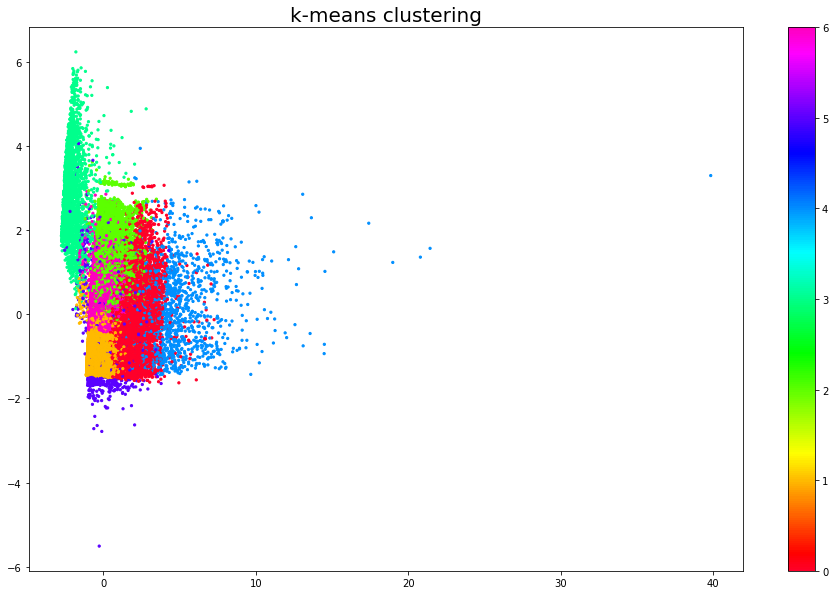

In [50]:
plt.figure(figsize=(16, 10))
plt.scatter(
    df_pca["pc_1"], df_pca["pc_2"], c=df_pca["kmeans_labels"], s=5, cmap="gist_rainbow"
)
plt.title("k-means clustering", fontdict={"fontsize": 20})
plt.colorbar()
plt.show()

## <a name="C4">DBSCAN

In [51]:
# Nous allons maintenant tester l'utilisation de l'algorithme DBSCAN pour réaliser un clustering.

from sklearn.cluster import DBSCAN

In [52]:
# Pour des questions de temps de calcul, on réduit le jeu de données de 80%.

df_final_sample = df_final.sample(frac=0.2, random_state=42)

In [53]:
df_final_sample

customer_unique_id  mean_payment_installments  \
72944  c3818f2a1aa9b856afa2cc5adf8e97b7                        8.0   
572    017fde295de136549d89d951da362287                        2.0   
34451  5c09104738f3ab63154beff17cada1c3                        1.0   
83539  dfe404bc538d4172a3c0291fca2e74ee                        1.0   
57351  99c2432f032d3025a9bce64f35cdd72c                        1.0   
...                                 ...                        ...   
35456  5ec5450f2fd590b9dcc0dc9197b6af37                        1.0   
72806  c31ebd461283539cd2e73bfafbc0d73b                        5.0   
65736  b008a8d6518bc068dbde2d6f4f249c89                        5.0   
22175  3b4aa0dec50f090b3992b0541651da46                        1.0   
80646  d83533715a8843e3a26adf36d889e9b7                        6.0   

       number_of_orders  last_order_purchase_recency_in_months  \
72944                 1                               5.377732   
572                   1                              15.120489   
34451                 1                               1.908184   
83539                 1                              19.737337   
57351                 1                               3.542134   
...                 ...                                    ...   
35456                 1                               3.611912   
72806                 1                               9.303249   
65736                 1                               8.842601   
22175                 1                              14.104129   
80646                 1                              17.315784   

       mean_ratio_voucher  mean_review_score  mean_order_value  kmeans_labels  
72944                 0.0                5.0            243.36              0  
572                   0.0                5.0             43.91              6  
34451                 0.0                3.0             69.44              1  
83539                 0.0                4.0            846.72              6  
57351                 0.0                5.0            874.33              1  
...                   ...                ...               ...            ...  
35456                 0.0                5.0             91.61              1  
72806                 0.0                5.0             51.24              1  
65736                 0.0                5.0            101.12              1  
22175                 0.0                5.0             77.77              6  
80646                 0.0                5.0            126.39              6  

[19075 rows x 8 columns]

In [54]:
df_final_sample["number_of_orders"].value_counts()

1     18458
2       488
3        93
4        23
5         7
6         3
7         2
17        1
Name: number_of_orders, dtype: int64

In [55]:
X = df_final_sample.drop(["customer_unique_id", "kmeans_labels"], axis=1)
X_norm = StandardScaler().fit_transform(X)

In [56]:
# On utilise dans un premier temps le DBSCAN avec les hyperparamètres par défaut.

dbscan = DBSCAN()

In [57]:
dbscan.fit(X_norm)

DBSCAN()

In [58]:
# On analyse le nombre de clusters obtenus ainsi que le nombre de clients associés à chaque cluster.

np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       dtype=int64),
 array([ 1010, 10024,  1397,    11,  3405,  1874,   294,   475,    64,
          295,    16,    20,    23,    13,     6,    23,    25,     7,
            6,    11,     9,     5,     6,     7,     7,     6,     5,
            5,     5,     6,     5,     5,     5], dtype=int64))

--> On obtient 32 clusters dont la majorité contiennent moins de 25 clients. On va donc essayer différentes combinaisons des hyperparamètres eps et min_samples afin d'obtenir un nombre raisonnable de clusters et également des clusters qui seraient mieux équilibrés.

In [59]:
silhouette_score(X_norm, dbscan.labels_)

-0.016088721370022815

--> Le mauvais clustering est confirmé par le coefficient de silhouette qui est négatif.

In [60]:
# Essayons donc maintenant différentes combinaisons de eps et min_samples et stockons pour chaque combinaison
# le nombre de clusters ainsi que le coefficient de silhouette dans un dataframe.

eps_list = [0.5, 0.6, 0.8]
min_samples_list = [5, 10, 20, 50]
df_results = pd.DataFrame(
    columns=["eps", "min_samples", "number_of_clusters", "silhouette_score"]
)

for eps in eps_list:
    for min_samples in min_samples_list:
        dbscan_iter = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_iter.fit(X_norm)
        df_results = df_results.append(
            {
                "eps": eps,
                "min_samples": min_samples,
                "number_of_clusters": (np.unique(dbscan_iter.labels_).size - 1),
                "silhouette_score": silhouette_score(X_norm, dbscan_iter.labels_),
            },
            ignore_index=True,
        )

In [61]:
df_results

eps  min_samples  number_of_clusters  silhouette_score
0   0.5          5.0                32.0         -0.016089
1   0.5         10.0                15.0         -0.005176
2   0.5         20.0                 8.0          0.031040
3   0.5         50.0                 7.0          0.000620
4   0.6          5.0                28.0          0.000316
5   0.6         10.0                12.0          0.068183
6   0.6         20.0                 9.0          0.016060
7   0.6         50.0                 8.0         -0.018355
8   0.8          5.0                 9.0          0.282222
9   0.8         10.0                 8.0          0.401169
10  0.8         20.0                 3.0          0.423027
11  0.8         50.0                 3.0          0.405879

In [62]:
# On remarque que les meilleurs coefficients de silhouette et un nombre de clusters raisonnables sont obtenus pour
# eps=0.8 et min_samples=10 et pour eps=0.8 et min_samples=20.
# Analysons les clusters obtenus pour ces deux combinaisons.

# Commençons par la combinaison eps=0.8 et min_samples=10 :

dbscan_10 = DBSCAN(eps=0.8, min_samples=10)

In [63]:
dbscan_10.fit(X_norm)

DBSCAN(eps=0.8, min_samples=10)

In [64]:
silhouette_score(X_norm, dbscan_10.labels_)

0.40116940690092034

In [65]:
df_final_sample["dbscan_10_labels"] = dbscan_10.labels_

In [66]:
df_labels = pd.pivot_table(
    df_final_sample,
    index=["dbscan_10_labels"],
    values=[
        "mean_payment_installments",
        "last_order_purchase_recency_in_months",
        "mean_ratio_voucher",
        "mean_review_score",
        "mean_order_value",
        "number_of_orders",
    ],
    aggfunc={
        "mean_payment_installments": [len, np.mean],
        "last_order_purchase_recency_in_months": np.mean,
        "mean_ratio_voucher": np.mean,
        "mean_review_score": np.mean,
        "mean_order_value": np.mean,
        "number_of_orders": np.mean,
    },
)

In [67]:
df_labels

last_order_purchase_recency_in_months mean_order_value  \
                                                  mean             mean   
dbscan_10_labels                                                          
-1                                           10.472625       698.313843   
 0                                            9.451405       144.260189   
 1                                            9.972377        93.216230   
 2                                            7.972003       125.415730   
 3                                            7.356315       121.009091   
 4                                           13.018326      1302.535000   
 5                                           12.116324      1365.762000   
 6                                           14.355775       165.461250   
 7                                            4.106470      1357.598000   

                 mean_payment_installments           mean_ratio_voucher  \
                                       len      mean               mean   
dbscan_10_labels                                                          
-1                                     644  5.444866           0.175136   
 0                                   17497  2.869006           0.000120   
 1                                     488  1.022541           0.917543   
 2                                     363  2.830579           0.000401   
 3                                      44  2.159091           0.000000   
 4                                      12  1.166667           0.000000   
 5                                      10  8.100000           0.000000   
 6                                      12  8.916667           0.000000   
 7                                       5  8.000000           0.000000   

                 mean_review_score number_of_orders  
                              mean             mean  
dbscan_10_labels                                     
-1                        3.366198         1.545031  
 0                        4.103503         1.000000  
 1                        4.321721         1.000000  
 2                        4.369146         2.000000  
 3                        4.848485         3.000000  
 4                        4.833333         1.000000  
 5                        4.900000         1.000000  
 6                        4.916667         2.000000  
 7                        5.000000         1.000000

In [68]:
df_labels.columns = [
    "mean_last_order_purchase_recency_in_months",
    "mean_order_value",
    "count",
    "mean_payment_installments",
    "mean_ratio_voucher",
    "mean_review_score",
    "mean_number_of_orders",
]

df_labels = df_labels[
    [
        "count",
        "mean_last_order_purchase_recency_in_months",
        "mean_review_score",
        "mean_ratio_voucher",
        "mean_payment_installments",
        "mean_order_value",
        "mean_number_of_orders",
    ]
]

In [69]:
df_labels

count  mean_last_order_purchase_recency_in_months  \
dbscan_10_labels                                                      
-1                  644                                   10.472625   
 0                17497                                    9.451405   
 1                  488                                    9.972377   
 2                  363                                    7.972003   
 3                   44                                    7.356315   
 4                   12                                   13.018326   
 5                   10                                   12.116324   
 6                   12                                   14.355775   
 7                    5                                    4.106470   

                  mean_review_score  mean_ratio_voucher  \
dbscan_10_labels                                          
-1                         3.366198            0.175136   
 0                         4.103503            0.000120   
 1                         4.321721            0.917543   
 2                         4.369146            0.000401   
 3                         4.848485            0.000000   
 4                         4.833333            0.000000   
 5                         4.900000            0.000000   
 6                         4.916667            0.000000   
 7                         5.000000            0.000000   

                  mean_payment_installments  mean_order_value  \
dbscan_10_labels                                                
-1                                 5.444866        698.313843   
 0                                 2.869006        144.260189   
 1                                 1.022541         93.216230   
 2                                 2.830579        125.415730   
 3                                 2.159091        121.009091   
 4                                 1.166667       1302.535000   
 5                                 8.100000       1365.762000   
 6                                 8.916667        165.461250   
 7                                 8.000000       1357.598000   

                  mean_number_of_orders  
dbscan_10_labels                         
-1                             1.545031  
 0                             1.000000  
 1                             1.000000  
 2                             2.000000  
 3                             3.000000  
 4                             1.000000  
 5                             1.000000  
 6                             2.000000  
 7                             1.000000

In [70]:
# Proportion de clients par cluster :

(df_labels["count"] / df_labels["count"].sum()).sort_values(ascending=False)

dbscan_10_labels
 0    0.917274
-1    0.033761
 1    0.025583
 2    0.019030
 3    0.002307
 4    0.000629
 6    0.000629
 5    0.000524
 7    0.000262
Name: count, dtype: float64

--> On remarque que les clusters ne sont pas bien équilibrés. En effet le cluster '0' contient 17 497 clients soit 91% de l'ensemble des clients. Ensuite en terme de nombre de clients on aurait le cluster '-1' (644 clients soit 3%) qui ne représente pas un cluster mais l'ensemble des clients qui n'ont pas été affectés à un cluster. Donc ce clustering ne semble pas utilisable.

In [71]:
# Analysons maintenant le clustering obtenus avec eps=0.8 et min_samples=20 :

dbscan_20 = DBSCAN(eps=0.8, min_samples=20)

In [72]:
dbscan_20.fit(X_norm)

DBSCAN(eps=0.8, min_samples=20)

In [73]:
silhouette_score(X_norm, dbscan_20.labels_)

0.42302699997750415

In [74]:
df_final_sample["dbscan_20_labels"] = dbscan_20.labels_

In [75]:
df_labels = pd.pivot_table(
    df_final_sample,
    index=["dbscan_20_labels"],
    values=[
        "mean_payment_installments",
        "last_order_purchase_recency_in_months",
        "mean_ratio_voucher",
        "mean_review_score",
        "mean_order_value",
        "number_of_orders",
    ],
    aggfunc={
        "mean_payment_installments": [len, np.mean],
        "last_order_purchase_recency_in_months": np.mean,
        "mean_ratio_voucher": np.mean,
        "mean_review_score": np.mean,
        "mean_order_value": np.mean,
        "number_of_orders": np.mean,
    },
)

In [76]:
df_labels

last_order_purchase_recency_in_months mean_order_value  \
                                                  mean             mean   
dbscan_20_labels                                                          
-1                                           10.427970       622.867852   
 0                                            9.440881       139.696834   
 1                                            9.900112        91.770268   
 2                                            7.661156       117.902934   

                 mean_payment_installments           mean_ratio_voucher  \
                                       len      mean               mean   
dbscan_20_labels                                                          
-1                                     973  5.004618           0.183315   
 0                                   17374  2.848739           0.000112   
 1                                     411  1.014599           0.930264   
 2                                     317  2.487382           0.000459   

                 mean_review_score number_of_orders  
                              mean             mean  
dbscan_20_labels                                     
-1                        3.365020         1.510791  
 0                        4.112006         1.000000  
 1                        4.678832         1.000000  
 2                        4.501577         2.000000

In [77]:
df_labels.columns = [
    "mean_last_order_purchase_recency_in_months",
    "mean_order_value",
    "count",
    "mean_payment_installments",
    "mean_ratio_voucher",
    "mean_review_score",
    "mean_number_of_orders",
]

df_labels = df_labels[
    [
        "count",
        "mean_last_order_purchase_recency_in_months",
        "mean_review_score",
        "mean_ratio_voucher",
        "mean_payment_installments",
        "mean_order_value",
        "mean_number_of_orders",
    ]
]

In [78]:
df_labels

count  mean_last_order_purchase_recency_in_months  \
dbscan_20_labels                                                      
-1                  973                                   10.427970   
 0                17374                                    9.440881   
 1                  411                                    9.900112   
 2                  317                                    7.661156   

                  mean_review_score  mean_ratio_voucher  \
dbscan_20_labels                                          
-1                         3.365020            0.183315   
 0                         4.112006            0.000112   
 1                         4.678832            0.930264   
 2                         4.501577            0.000459   

                  mean_payment_installments  mean_order_value  \
dbscan_20_labels                                                
-1                                 5.004618        622.867852   
 0                                 2.848739        139.696834   
 1                                 1.014599         91.770268   
 2                                 2.487382        117.902934   

                  mean_number_of_orders  
dbscan_20_labels                         
-1                             1.510791  
 0                             1.000000  
 1                             1.000000  
 2                             2.000000

In [79]:
# Proportion de clients par cluster :

(df_labels["count"] / df_labels["count"].sum()).sort_values(ascending=False)

dbscan_20_labels
 0    0.910826
-1    0.051009
 1    0.021547
 2    0.016619
Name: count, dtype: float64

--> Comme précédemment, avec ce clustering, le bruit ('-1') représenterait le 2ème "cluster" avec 973 clients soit 5% du total clients et le 1er cluster représenterait 91% des clients, ce qui est également très désequilibré.  

On peut donc conclure que l'algorithme DBSCAN ne semble pas approprié pour ce jeu de données.

## <a name="C5">Clustering hiérarchique

In [80]:
# Nous allons maintenant tester le clustering hiérarchique sur le jeu de données réduit de 80% pour des questions de temps
# de calcul également.

from sklearn.cluster import AgglomerativeClustering

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage

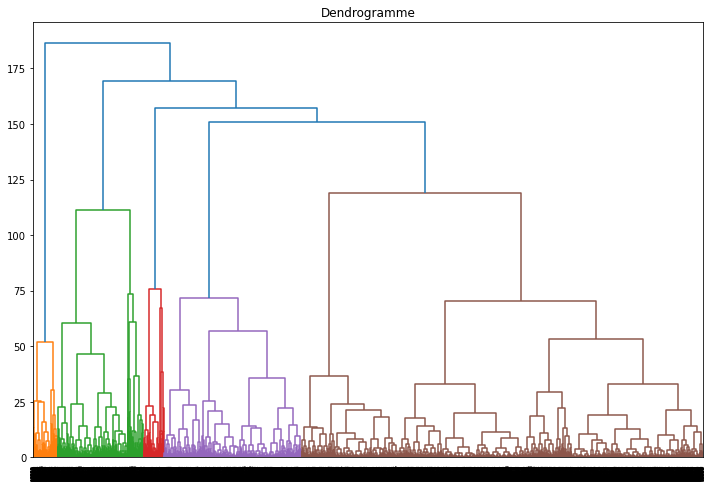

In [82]:
# Affichons dans un 1er temps le dendrogramme de ce jeu de données.

plt.figure(figsize=(12, 8))
plt.title("Dendrogramme")
dn = dendrogram(linkage(X_norm, method="ward"))
plt.show()

--> En analysant le dendrogramme, on peut penser qu'une découpe vers l'ordonnée 80 serait une bonne découpe pour le clustering. On obtiendrait alors 7 clusters.

In [83]:
# Calculons donc maintenant le coefficient de silhouette pour différentes valeurs de 'n_clusters' de l'AgglomerativeClustering
# afin de voir si théoriquement on obtient ce même résultat de 7 clusters.

silhouettes = []

for num_clusters in range(2, 11):
    hierarchical_clust = AgglomerativeClustering(n_clusters=num_clusters)
    hierarchical_clust.fit(X_norm)
    silh = silhouette_score(X_norm, hierarchical_clust.labels_)
    silhouettes.append(silh)

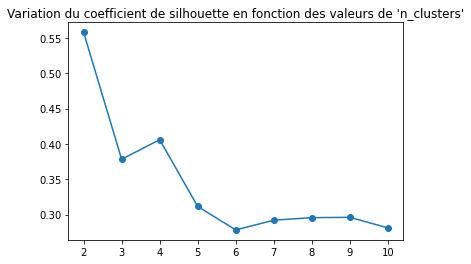

In [84]:
# On affiche les résultats sur un graphique pour le coefficient de silhouette.

plt.plot(range(2, 11), silhouettes, marker="o")
plt.title("Variation du coefficient de silhouette en fonction des valeurs de 'n_clusters'")
plt.show()

--> Le meilleur coefficient de silhouette est obtenu pour 2 clusters, ce qui semble être trop peu pour le besoin métier. Le 2ème meilleur coefficient est obtenu avec 4 clusters. Pour 7 clusters le coefficient de silhouette est environ de 0,3 comparé à 0,4 pour 4 clusters.

In [85]:
# Analysons le profil des clusters obtenus avec 2, 4 et 7 clusters.

In [86]:
# Fonction permettant d'afficher le résumé des profils des clusters.


def profil_clusters(df, labels):
    df_labels = pd.pivot_table(
        df,
        index=[labels],
        values=[
            "mean_payment_installments",
            "last_order_purchase_recency_in_months",
            "mean_ratio_voucher",
            "mean_review_score",
            "mean_order_value",
            "number_of_orders",
        ],
        aggfunc={
            "mean_payment_installments": [len, np.mean],
            "last_order_purchase_recency_in_months": np.mean,
            "mean_ratio_voucher": np.mean,
            "mean_review_score": np.mean,
            "mean_order_value": np.mean,
            "number_of_orders": np.mean,
        },
    )

    df_labels.columns = [
        "mean_last_order_purchase_recency_in_months",
        "mean_order_value",
        "count",
        "mean_payment_installments",
        "mean_ratio_voucher",
        "mean_review_score",
        "mean_number_of_orders",
    ]

    df_labels = df_labels[
        [
            "count",
            "mean_last_order_purchase_recency_in_months",
            "mean_review_score",
            "mean_ratio_voucher",
            "mean_payment_installments",
            "mean_order_value",
            "mean_number_of_orders",
        ]
    ]

    return df_labels

In [87]:
# Commençons avec 2 clusters :

hierarchical_clust = AgglomerativeClustering(n_clusters=2)
hierarchical_clust.fit(X_norm)

df_final_sample["hierarchical_clust_2"] = hierarchical_clust.labels_

In [88]:
profil_clusters(df_final_sample, "hierarchical_clust_2")

count  mean_last_order_purchase_recency_in_months  \
hierarchical_clust_2                                                      
0                     18383                                    9.449468   
1                       692                                   10.058166   

                      mean_review_score  mean_ratio_voucher  \
hierarchical_clust_2                                          
0                              4.092268            0.000514   
1                              4.101156            0.799617   

                      mean_payment_installments  mean_order_value  \
hierarchical_clust_2                                                
0                                      2.964124        164.605708   
1                                      1.559971        118.915173   

                      mean_number_of_orders  
hierarchical_clust_2                         
0                                  1.041941  
1                                  1.062139

In [89]:
# Proportion de clients par cluster :

(
    df_final_sample["hierarchical_clust_2"].value_counts()
    / df_final_sample["hierarchical_clust_2"].size
).sort_values(ascending=False)

0    0.963722
1    0.036278
Name: hierarchical_clust_2, dtype: float64

--> Les 2 clusters sont très deséquilibrés (96% / 4%) et la variable très différenciante entre les 2 clusters est le % de voucher utilisé (cluster 0 = 0%, cluster 1 = 80%).

In [90]:
# Analysons maintenant avec 4 clusters :

hierarchical_clust = AgglomerativeClustering(n_clusters=4)
hierarchical_clust.fit(X_norm)

df_final_sample["hierarchical_clust_4"] = hierarchical_clust.labels_

In [91]:
profil_clusters(df_final_sample, "hierarchical_clust_4")

count  mean_last_order_purchase_recency_in_months  \
hierarchical_clust_4                                                      
0                     15346                                    9.463785   
1                       571                                    8.580736   
2                      2466                                    9.561527   
3                       692                                   10.058166   

                      mean_review_score  mean_ratio_voucher  \
hierarchical_clust_4                                          
0                              4.100743            0.000071   
1                              4.145647            0.009077   
2                              4.027170            0.001291   
3                              4.101156            0.799617   

                      mean_payment_installments  mean_order_value  \
hierarchical_clust_4                                                
0                                      2.087254        124.340296   
1                                      3.309095        152.446795   
2                                      8.341038        417.994092   
3                                      1.559971        118.915173   

                      mean_number_of_orders  
hierarchical_clust_4                         
0                                  1.000000  
1                                  2.343257  
2                                  1.001622  
3                                  1.062139

In [92]:
# Proportion de clients par cluster :

(
    df_final_sample["hierarchical_clust_4"].value_counts()
    / df_final_sample["hierarchical_clust_4"].size
).sort_values(ascending=False)

0    0.804509
2    0.129279
3    0.036278
1    0.029934
Name: hierarchical_clust_4, dtype: float64

--> Les clusters sont ici aussi assez deséquilibrés et les variables différenciantes par cluster sont les suivantes :  
1 --> clients ayant passé plusieurs commandes.  
2 --> clients qui ont passé une commande d'un montant elevé en payant en plusieurs fois.  
3 --> clients qui ont payé à 80% avec des vouchers.

In [93]:
# Analysons maintenant avec 7 clusters :

hierarchical_clust = AgglomerativeClustering(n_clusters=7)
hierarchical_clust.fit(X_norm)

df_final_sample["hierarchical_clust_7"] = hierarchical_clust.labels_

In [94]:
profil_clusters(df_final_sample, "hierarchical_clust_7")

count  mean_last_order_purchase_recency_in_months  \
hierarchical_clust_7                                                      
0                       571                                    8.580736   
1                       458                                   10.205407   
2                      8667                                    7.439488   
3                       692                                   10.058166   
4                      3911                                    8.834879   
5                      2768                                   16.690746   
6                      2008                                    9.414666   

                      mean_review_score  mean_ratio_voucher  \
hierarchical_clust_7                                          
0                              4.145647            0.009077   
1                              4.192140            0.004685   
2                              4.769355            0.000054   
3                              4.101156            0.799617   
4                              2.143186            0.000106   
5                              4.773121            0.000072   
6                              3.989542            0.000517   

                      mean_payment_installments  mean_order_value  \
hierarchical_clust_7                                                
0                                      3.309095        152.446795   
1                                      6.425764       1198.153253   
2                                      2.068651        121.057500   
3                                      1.559971        118.915173   
4                                      1.991562        129.592744   
5                                      2.280708        127.197836   
6                                      8.777888        240.049422   

                      mean_number_of_orders  
hierarchical_clust_7                         
0                                  2.343257  
1                                  1.008734  
2                                  1.000000  
3                                  1.062139  
4                                  1.000000  
5                                  1.000000  
6                                  1.000000

In [95]:
# Proportion de clients par cluster :

(
    df_final_sample["hierarchical_clust_7"].value_counts()
    / df_final_sample["hierarchical_clust_7"].size
).sort_values(ascending=False)

2    0.454364
4    0.205033
5    0.145111
6    0.105269
3    0.036278
0    0.029934
1    0.024010
Name: hierarchical_clust_7, dtype: float64

--> Avec 7 clusters, on retrouve la segmentation que l'on avait obtenu en utilisant le k-means avec k=7 :  
0 --> clients qui ont passé plusieurs commandes.  
1 --> clients qui ont passé une commande d'un montant élevé et qui sont assez satisfaits.  
2 --> clients qui ont passé leur dernière commande récemment et qui sont très satisfaits.  
3 --> clients qui utilisent à 80% des vouchers pour payer.  
4 --> clients mécontents.  
5 --> clients qui ont passé leur dernière commande il y a longtemps et qui sont très satisfaits.  
6 --> clients d'un niveau économique plus faible car ils paient en 9 fois des montants beacoup plus faibles que par exemple le groupe 1 dont les clients paient en 6 fois.

--> D'un point de vue métier, cette segmentation en 7 groupes semble être la plus pertinente dans la perspective de faire ensuite des campagnes de marketing ciblées par rapport au niveau économique des clients, de leur satisfaction ou de leur appétence pour des bons de réduction par exemple.

# <a name="C6">Simulation : Analyse de la stabilité temporelle de la segmentation retenue

In [96]:
# Nous allons donc maintenant étudier la stabilité temporelle de la segmentation clients retenue dans le but d'établir un
# contrat de maintenance.

# Nous allons pour cela repartir du dataframe des commandes clients.

df_orders = pd.read_csv("df_orders.csv", sep=",")

In [97]:
df_orders

Unnamed: 0                          order_id  \
0               0  e481f51cbdc54678b7cc49136f2d6af7   
1               1  53cdb2fc8bc7dce0b6741e2150273451   
2               2  47770eb9100c2d0c44946d9cf07ec65d   
3               3  949d5b44dbf5de918fe9c16f97b45f8a   
4               4  ad21c59c0840e6cb83a9ceb5573f8159   
...           ...                               ...   
99215       99215  9c5dedf39a927c1b2549525ed64a053c   
99216       99216  63943bddc261676b46f01ca7ac2f7bd8   
99217       99217  83c1379a015df1e13d02aae0204711ab   
99218       99218  11c177c8e97725db2631073c19f07b62   
99219       99219  66dea50a8b16d9b4dee7af250b4be1a5   

                            customer_id order_status order_purchase_timestamp  \
0      9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1      b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2      41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3      f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4      8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   
...                                 ...          ...                      ...   
99215  39bd1228ee8140590ac3aca26f2dfe00    delivered      2017-03-09 09:54:05   
99216  1fca14ff2861355f6e5f14306ff977a7    delivered      2018-02-06 12:58:58   
99217  1aa71eb042121263aafbe80c1b562c9c    delivered      2017-08-27 14:46:43   
99218  b331b74b18dc79bcdf6532d51e1637c1    delivered      2018-01-08 21:28:27   
99219  edb027a75a1449115f6b43211ae02a24    delivered      2018-03-08 20:57:30   

         order_approved_at order_delivered_carrier_date  \
0      2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 22:20:29          2018-02-14 19:46:34   
...                    ...                          ...   
99215  2017-03-09 09:54:05          2017-03-10 11:18:03   
99216  2018-02-06 13:10:37          2018-02-07 23:22:42   
99217  2017-08-27 15:04:16          2017-08-28 20:52:26   
99218  2018-01-08 21:36:21          2018-01-12 15:35:03   
99219  2018-03-09 11:20:28          2018-03-09 22:11:59   

      order_delivered_customer_date order_estimated_delivery_date  \
0               2017-10-10 21:25:13           2017-10-18 00:00:00   
1               2018-08-07 15:27:45           2018-08-13 00:00:00   
2               2018-08-17 18:06:29           2018-09-04 00:00:00   
3               2017-12-02 00:28:42           2017-12-15 00:00:00   
4               2018-02-16 18:17:02           2018-02-26 00:00:00   
...                             ...                           ...   
99215           2017-03-17 15:08:01           2017-03-28 00:00:00   
99216           2018-02-28 17:37:56           2018-03-02 00:00:00   
99217           2017-09-21 11:24:17           2017-09-27 00:00:00   
99218           2018-01-25 23:32:54           2018-02-15 00:00:00   
99219           2018-03-16 13:08:30           2018-04-03 00:00:00   

       max_payment_installments  ...  review_score  review_comment_title  \
0                             1  ...             4                   NaN   
1                             1  ...             4      Muito boa a loja   
2                             3  ...             5                   NaN   
3                             1  ...             5                   NaN   
4                             1  ...             5                   NaN   
...                         ...  ...           ...                   ...   
99215                         3  ...             5                   NaN   
99216                         3  ...             4                   NaN   
99217                         5  ...             5                   NaN   
99218                         4  ...             2                   NaN   

In [98]:
df_orders = df_orders.drop("Unnamed: 0", axis=1)

In [99]:
df_orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99215  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99216  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99217  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99218  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99219  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99215    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99216    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99217    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99218    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99219    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99215          2017-03-10 11:18:03           2017-03-17 15:08:01   
99216          2018-02-07 23:22:42           2018-02-28 17:37:56   
99217          2017-08-28 20:52:26           2017-09-21 11:24:17   
99218          2018-01-12 15:35:03           2018-01-25 23:32:54   
99219          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  max_payment_installments  \
0               2017-10-18 00:00:00                         1   
1               2018-08-13 00:00:00                         1   
2               2018-09-04 00:00:00                         3   
3               2017-12-15 00:00:00                         1   
4               2018-02-26 00:00:00                         1   
...                             ...                       ...   
99215           2017-03-28 00:00:00                         3   
99216           2018-03-02 00:00:00                         3   
99217           2017-09-27 00:00:00                         5   
99218           2018-02-15 00:00:00                         4   
99219           2018-04-03 00:00:00                         1   

       sum_payment_value  ...  review_score review_comment_title  \
0                  38.71  ...             4                  NaN   
1                 141.46  ...             4     Muito boa a loja   
2                 179.12  ...             5                  NaN   
3                  72.20  ...             5                  NaN   
4                  28.62  ...             5                  NaN   
...                  ...  ...           ...                  ...   
99215              85.08  ...             5                  NaN   
99216             195.00  ...             4                  NaN   
99217             271.01  ...             5                  NaN   
99218      

In [100]:
df_orders["order_purchase_timestamp"].min()

'2016-09-04 21:15:19'

In [101]:
df_orders["order_purchase_timestamp"].max()

'2018-10-17 17:30:18'

In [102]:
df_orders["order_purchase_timestamp"] = pd.to_datetime(
    df_orders["order_purchase_timestamp"]
)

In [103]:
(
    df_orders["order_purchase_timestamp"].max()
    - df_orders["order_purchase_timestamp"].min()
) / np.timedelta64(1, "M")

25.391691440922433

--> Les commandes se répartissent sur 25 mois entre le 04/09/2016 et le 17/10/2018. Pour analyser la stabilité temporelle de la segmentation, nous allons entraîner dans un premier temps le k-means avec k=7 sur les 12 premiers mois de commandes puis nous allons comparer ce modèle avec un modèle réentrainé sur la base de données élargie à 12 mois + X mois où l'on fera varier X de 1 à 13 pour arriver aux 25 mois de la base de données totale. Pour la comparaison des 2 modèles nous utiliserons le Adjusted Rand Index (ARI) et nous analyserons ensuite s'il y a un point d'inflexion de ce score ARI au cours du temps.

In [104]:
# On crée tout d'abord une fonction qui permet de créer le jeu de données sur lequel nous appliquerons le k-means. On part du
# dataframe des orders pour ensuite ne garder que les commandes qui seront dans la période 'initial_period + period_to_add' puis
# on synthétise les données nécessaires par client.
# Dans notre cas nous utiliserons initial_period = 12 (mois) puis nous ferons varier 'period_to_add' de 1 à 13.


def creation_df_customer(df, initial_period, period_to_add):
    min_date = df["order_purchase_timestamp"].min()
    total_period = (
        min_date
        + np.timedelta64(initial_period, "M")
        + np.timedelta64(period_to_add, "M")
    )
    df_period = df[df["order_purchase_timestamp"] < total_period]
    df_period["order_purchase_recency_in_months"] = -(
        df_period["order_purchase_timestamp"]
        - df_period["order_purchase_timestamp"].max()
    ) / np.timedelta64(1, "M")

    df_period_pivot = pd.pivot_table(
        df_period,
        index=["customer_unique_id"],
        values=[
            "order_id",
            "max_payment_installments",
            "sum_payment_value",
            "ratio_voucher_payment_value",
            "review_score",
            "order_purchase_recency_in_months",
        ],
        aggfunc={
            "order_id": len,
            "max_payment_installments": np.mean,
            "sum_payment_value": np.mean,
            "ratio_voucher_payment_value": np.mean,
            "review_score": np.mean,
            "order_purchase_recency_in_months": np.min,
        },
    )

    df_period_pivot = df_period_pivot.reset_index()

    df_period_pivot.columns = [
        "customer_unique_id",
        "mean_payment_installments",
        "number_of_orders",
        "last_order_purchase_recency_in_months",
        "mean_ratio_voucher",
        "mean_review_score",
        "mean_order_value",
    ]

    return df_period_pivot

In [105]:
# On applique le k-means avec k=7 sur le jeu de données n'incluant que les 12 premiers mois de commandes

# On crée tout d'abord le jeu de données sur les 12 premiers mois.

df_initial = creation_df_customer(df=df_orders, initial_period=12, period_to_add=0)

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
df_initial

customer_unique_id  mean_payment_installments  \
0      0000f46a3911fa3c0805444483337064                        8.0   
1      0005e1862207bf6ccc02e4228effd9a0                        3.0   
2      0006fdc98a402fceb4eb0ee528f6a8d4                        2.0   
3      000a5ad9c4601d2bbdd9ed765d5213b3                        3.0   
4      000de6019bb59f34c099a907c151d855                        4.0   
...                                 ...                        ...   
22966  fff3a9369e4b7102fab406a334a678c3                        2.0   
22967  fff699c184bcc967d62fa2c6171765f7                        1.0   
22968  fffcf5a5ff07b0908bd4e2dbc735a684                       10.0   
22969  ffff371b4d645b6ecea244b27531430a                        1.0   
22970  ffffd2657e2aad2907e67c3e9daecbeb                        4.0   

       number_of_orders  last_order_purchase_recency_in_months  \
0                     1                               5.855342   
1                     1                               6.049114   
2                     1                               1.600221   
3                     1                               0.805724   
4                     1                               0.601173   
...                 ...                                    ...   
22966                 1                               0.810256   
22967                 1                               0.111171   
22968                 1                               2.898504   
22969                 1                               6.881048   
22970                 1                               4.115089   

       mean_ratio_voucher  mean_review_score  mean_order_value  
0                     0.0                3.0             86.22  
1                     0.0                4.0            150.12  
2                     0.0                3.0             29.00  
3                     0.0                4.0             91.28  
4                     0.0                2.0            257.44  
...                   ...                ...               ...  
22966                 0.0                5.0            102.74  
22967                 0.0                4.0             55.00  
22968                 0.0                5.0           2067.42  
22969                 0.0                5.0            112.46  
22970                 0.0                5.0             71.56  

[22971 rows x 7 columns]

In [107]:
# On normalise le jeu de données obtenu.

X_init = df_initial.drop(["customer_unique_id"], axis=1)
stdScaler = StandardScaler()
X_init_norm = stdScaler.fit_transform(X_init)

# Et on applique ensuite le k-means avec k=7.

kmeans_initial = KMeans(n_clusters=7)
kmeans_initial.fit(X_init_norm)

KMeans(n_clusters=7)

In [108]:
df_initial["kmeans_initial_labels"] = kmeans_initial.labels_

In [109]:
# On vérifie que l'on retrouve bien les profils de clients déterminés précédemment pour le k-means avec k=7.

profil_clusters(df_initial, "kmeans_initial_labels")

count  mean_last_order_purchase_recency_in_months  \
kmeans_initial_labels                                                      
0                       5829                                    5.709727   
1                       3110                                    3.731271   
2                       3351                                    3.155721   
3                       8824                                    1.707325   
4                        614                                    2.841833   
5                        381                                    3.276316   
6                        862                                    3.190813   

                       mean_review_score  mean_ratio_voucher  \
kmeans_initial_labels                                          
0                               4.592211            0.001789   
1                               1.455627            0.001381   
2                               4.535959            0.003006   
3                               4.631913            0.001772   
4                               4.090689            0.026857   
5                               3.926509            0.005229   
6                               4.083527            0.892429   

                       mean_payment_installments  mean_order_value  \
kmeans_initial_labels                                                
0                                       1.952136        120.096929   
1                                       3.109325        146.908826   
2                                       8.278126        240.064554   
3                                       2.067543        114.385052   
4                                       3.825000        135.317687   
5                                       6.422572       1465.992073   
6                                       1.172854        110.714008   

                       mean_number_of_orders  
kmeans_initial_labels                         
0                                   1.000000  
1                                   1.000000  
2                                   1.000000  
3                                   1.000000  
4                                   2.379479  
5                                   1.010499  
6                                   1.018561

In [110]:
# Proportion de clients par cluster :

(
    df_initial["kmeans_initial_labels"].value_counts()
    / df_initial["kmeans_initial_labels"].size
).sort_values(ascending=False)

3    0.384137
0    0.253755
2    0.145880
1    0.135388
6    0.037526
4    0.026729
5    0.016586
Name: kmeans_initial_labels, dtype: float64

--> On retrouve bien les mêmes profils de clients.

In [111]:
# Nous allons maintenant réaliser une boucle dans laquelle pour chaque mois rajouté, nous allons créer le nouveau
# dataframe des clients prenant en compte les nouvelles commandes, réentrainer un k-means sur ce nouveau jeu de données, 
# puis comparer grâce au ARI les résultats avec le k-means initialement entrainé.

# Période totale de commandes à disposition.
total_period = (
    df_orders["order_purchase_timestamp"].max()
    - df_orders["order_purchase_timestamp"].min()
) / np.timedelta64(1, "M")

# On stockera les résultats dans un dataframe.
df_results = pd.DataFrame(columns=["period_added", "ARI initial customers"])


for i in range(1, int((total_period - 11))):
    
    # Création du nouveau dataframe clients prenant en compte la nouvelle période de commandes.
    df_i_period = creation_df_customer(df=df_orders, initial_period=12, period_to_add=i)
    X_i = df_i_period.drop(["customer_unique_id"], axis=1)
    
    # On normalise les variables grâce à un nouveau StandardScaler.
    X_i_norm = StandardScaler().fit_transform(X_i)
    
    # On entraîne un nouveau k-means sur le nouveau jeu de données.
    kmeans_i = KMeans(n_clusters=7)
    kmeans_i.fit(X_i_norm)

    # On normalise également le nouveau jeu de données avec le StandardScaler utilisé pour entrainer le k-means initial sur
    # les 12 premiers mois.
    X_i_norm_init = stdScaler.transform(X_i)
    
    
    # On stocke le résultat du ARI entre le k-means initial et le nouveau k-means appliqué au nouveau jeu de données.
    df_results = df_results.append(
        {
            "period_added": i,
            "ARI initial customers": ari(
                kmeans_initial.predict(X_i_norm_init), kmeans_i.labels_
            ),
        },
        ignore_index=True,
    )

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [112]:
df_results

period_added  ARI initial customers
0            1.0               0.884698
1            2.0               0.783480
2            3.0               0.753943
3            4.0               0.649396
4            5.0               0.614027
5            6.0               0.571935
6            7.0               0.480259
7            8.0               0.438892
8            9.0               0.382283
9           10.0               0.339069
10          11.0               0.309833
11          12.0               0.296395
12          13.0               0.252443

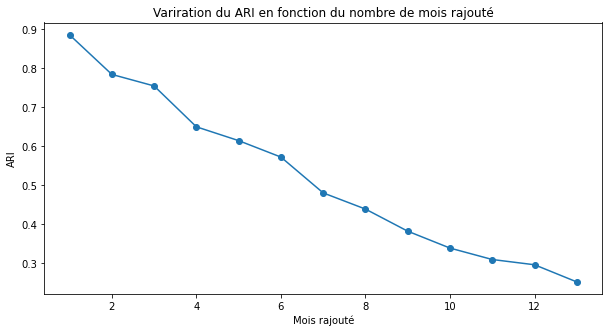

In [113]:
# On affiche les résultats du ARI en fonction du nombre de mois rajouté au 12 mois initiaux.

plt.figure(figsize=(10, 5))
plt.plot(df_results["period_added"], df_results["ARI initial customers"], marker="o")
plt.xlabel('Mois rajouté')
plt.ylabel('ARI')
plt.title('Variration du ARI en fonction du nombre de mois rajouté')
plt.show()

--> On remarque une diminution continue du ARI dans le temps. Donc la 1ière maintenance devrait intervenir à la fin du 1er mois.

In [114]:
# Analysons maintenant l'impact de ne pas normaliser le nouveau jeu de données avec le StandardScaler utilisé lors de 
# l'entraînement du k-means initial mais avec un nouveau StandScaler.

total_period = (
    df_orders["order_purchase_timestamp"].max()
    - df_orders["order_purchase_timestamp"].min()
) / np.timedelta64(1, "M")

df_results = pd.DataFrame(columns=["period_added", "ARI initial customers"])

for i in range(1, int((total_period - 11))):
    df_i_period = creation_df_customer(df=df_orders, initial_period=12, period_to_add=i)
    X_i = df_i_period.drop(["customer_unique_id"], axis=1)
    X_i_norm = StandardScaler().fit_transform(X_i)
    kmeans_i = KMeans(n_clusters=7)
    kmeans_i.fit(X_i_norm)
    
    # On ne transforme pas le nouveau jeu de données avec le StandardScaler initial mais avec un StandardScaler réentrainé
    # avec le nouveau jeu de données. Pour le ARI on fait donc un predict sur 'X_i_norm' obtenu précédemment.
    # X_i_norm_init = stdScaler.transform(X_i)

    df_results = df_results.append(
        {
            "period_added": i,
            "ARI initial customers": ari(
                kmeans_initial.predict(X_i_norm), kmeans_i.labels_
            ),
        },
        ignore_index=True,
    )

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bmeur\AppData\Local\Temp/ipykernel_16568/2152457660.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [115]:
df_results

period_added  ARI initial customers
0            1.0               0.970793
1            2.0               0.971809
2            3.0               0.973196
3            4.0               0.958945
4            5.0               0.932604
5            6.0               0.915732
6            7.0               0.908974
7            8.0               0.890055
8            9.0               0.891869
9           10.0               0.892255
10          11.0               0.871243
11          12.0               0.894320
12          13.0               0.894386

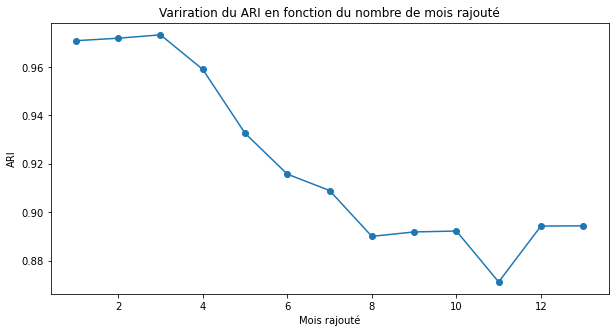

In [116]:
# On affiche les résultats du ARI en fonction du nombre de mois rajouté au 12 mois initiaux.

plt.figure(figsize=(10, 5))
plt.plot(df_results["period_added"], df_results["ARI initial customers"], marker="o")
plt.xlabel('Mois rajouté')
plt.ylabel('ARI')
plt.title('Variration du ARI en fonction du nombre de mois rajouté')
plt.show()

--> On remarque que dans ce cas le ARI est plus stable dans le temps avec des valeurs plus grandes que précédemment. Le point d'inflexion se situe au 4ième mois donc dans ce cas, s'il est possible pour l'entreprise de réextraire facilement chaque mois la nouvelle base de données clients et que l'on applique un nouveau StandardScaler aux données avant d'utiliser le modèle, la 1ère maintenance devrait plutôt avoir lieu à la fin du 3ième mois.